In [2]:
#knn1+
import numpy as np 
import operator  

#创建简单数据集
def createDataSet():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels
    
# k近邻算法
def classify(inX,dataSet,labels,k): 
    # inX用于分类的输入向量 
    # dataSet输入的训练样本集
    # labels为标签向量 
    # k为最近的邻居数目
    
    # 计算距离
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX,(dataSetSize,1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1) 
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort()
    classCount = {}
    
    # 选择距离最小的k个点
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) +1 
    # 排序
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse= True) 
    return sortedClassCount[0][0]

group,labels=createDataSet()
print(group)
print(labels)
print(classify([0,0],group,labels,3))
print(classify([0,0],group,labels,2))
print(classify([0,0],group,labels,1))
print(classify([0.9,0.3],group,labels,3))

[[1.  1.1]
 [1.  1. ]
 [0.  0. ]
 [0.  0.1]]
['A', 'A', 'B', 'B']
B
B
B
A


[[4.0920000e+04 8.3269760e+00 9.5395200e-01]
 [1.4488000e+04 7.1534690e+00 1.6739040e+00]
 [2.6052000e+04 1.4418710e+00 8.0512400e-01]
 ...
 [2.6575000e+04 1.0650102e+01 8.6662700e-01]
 [4.8111000e+04 9.1345280e+00 7.2804500e-01]
 [4.3757000e+04 7.8826010e+00 1.3324460e+00]]
[3, 2, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3]


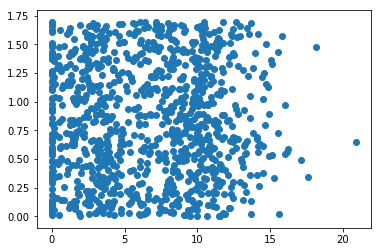

[[0.44832535 0.39805139 0.56233353]
 [0.15873259 0.34195467 0.98724416]
 [0.28542943 0.06892523 0.47449629]
 ...
 [0.29115949 0.50910294 0.51079493]
 [0.52711097 0.43665451 0.4290048 ]
 [0.47940793 0.3768091  0.78571804]]
[9.1273000e+04 2.0919349e+01 1.6943610e+00]
[0.       0.       0.001156]
the classifier came back with: 3, the real answer is :3
the classifier came back with: 2, the real answer is :2
the classifier came back with: 1, the real answer is :1
the classifier came back with: 1, the real answer is :1
the classifier came back with: 1, the real answer is :1
the classifier came back with: 1, the real answer is :1
the classifier came back with: 3, the real answer is :3
the classifier came back with: 3, the real answer is :3
the classifier came back with: 1, the real answer is :1
the classifier came back with: 3, the real answer is :3
the classifier came back with: 1, the real answer is :1
the classifier came back with: 1, the real answer is :1
the classifier came back with: 2,

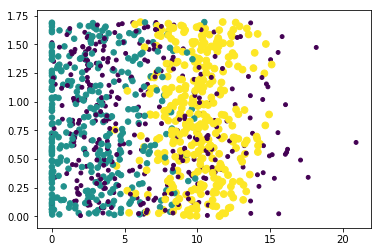

In [7]:
#knn2+
import numpy as np
import operator
import time

# 将文本记录转换为NumPy的解析程序
def file2matrix(filename):
    fr = open(filename)
    #得到文件行数
    arrayOfLines = fr.readlines()
    numberOfLines = len(arrayOfLines)
    #创建返回的Numpy矩阵
    returnMat = np.zeros((numberOfLines,3))
    classLabelVector = []
    #解析文件数据到列表
    index = 0
    for line in arrayOfLines:
        line = line.strip() #注释1
        listFromLine = line.split('\t') #注释2
        returnMat[index,:] = listFromLine[0:3]
        classLabelVector.append(int(listFromLine[-1]))
        index +=1
    return returnMat,classLabelVector


# 归一化特征值
def autoNorm(dataSet):
    minVals = dataSet.min(0) 
    maxVals = dataSet.max(0)
    ranges = maxVals - minVals 
    #创建一个与dataSet同大小的零矩阵
    normDataSet = np.zeros(np.shape(dataSet)) 
    #数据行数
    m = dataSet.shape[0]           
    #tile()函数将变量内容复制成输入矩阵同等的大小
    normDataSet = dataSet - np.tile(minVals,(m,1)) 
    #特征值相除
    normDataSet = normDataSet/np.tile(ranges,(m,1))
    return normDataSet,ranges,minVals

# k近邻算法
def classify0(inX,dataSet,labels,k):  
    #inX用于分类的输入向量
    #dataSet输入的训练样本集,
    #labels为标签向量, 
    #k用于选择最近的邻居数目
    
    #计算距离
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX,(dataSetSize,1)) - dataSet
    sqDiffMat = diffMat ** 2
    sqDistances = sqDiffMat.sum(axis=1) 
    distances = sqDistances ** 0.5
    sortedDistIndicies = distances.argsort() 
    classCount = {}
    #选择距离最小的k个点
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) +1 
    #排序
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse= True)
    return sortedClassCount[0][0]


# 分类器针对约会网站的测试代码
def datingClassTest():
    #测试样本的比例
    hoRatio = 0.10      
    datingDataMat,datingLabels = file2matrix("D:\\datingTestSet2.txt")
    normMat,ranges,minVals = autoNorm(datingDataMat)
    m = normMat.shape[0]
    #测试样本的数量
    numTestVecs = int(m*hoRatio)  
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],
                                     datingLabels[numTestVecs:m],4)
        print("the classifier came back with: %d, the real answer is :%d" %(classifierResult,datingLabels[i]))
        if (classifierResult != datingLabels[i]): errorCount +=1.0
    print("the total error rate is: %f" % (errorCount/float(numTestVecs)))


def classifyPerson():
    resultList = ['not at all','in small doses','in large doses']
    percentTats = float(input("percentage of time spent playing video games?"))
    ffMiles = float(input("frequent flier miles earned per year?"))
    iceCream = float(input("liters of ice cream consumed per year?"))
    datingDataMat,datingLabels = file2matrix('D:\\datingTestSet2.txt')
    normMat,ranges,minVals = autoNorm(datingDataMat)
    inArr = np.array([ffMiles,percentTats,iceCream])
    classifierResult = classify0((inArr - minVals)/ranges,normMat,datingLabels,3)
    print("You will probably like this person:",resultList[classifierResult - 1])

datingDataMat,datingLabels=file2matrix("D:\\datingTestSet2.txt")
print(datingDataMat)
print(datingLabels[0:20])

import matplotlib
import matplotlib.pyplot as plt
plt.scatter(datingDataMat[:,1],datingDataMat[:,2])
plt.show()
plt.scatter(datingDataMat[:,1],datingDataMat[:,2],15.0*np.array(datingLabels),15.0*np.array(datingLabels))

normMat,ranges,minVals=autoNorm(datingDataMat)
print(normMat)
print(ranges)
print(minVals)

datingClassTest()

classifyPerson()

In [5]:
#knn3+
# -*- coding:utf-8 -*-

import operator
import time
from os import listdir

# knn实现
def classify(inputPoint,dataSet,labels,k):
    '''
    inputPoint:待判断的点
    dataSet:数据集合
    labels:标签向量，维数和dataSet行数相同，比如labels[1]代表dataSet[1]的类别
    k:邻居数目
    输出：inputPoint的标签
    '''
    dataSetSize = dataSet.shape[0]     

    # 先用tile函数将输入点拓展成与训练集相同维数的矩阵，再计算欧氏距离
    diffMat = np.tile(inputPoint,(dataSetSize,1))-dataSet  
    sqDiffMat = diffMat ** 2                   

    # 计算每一行元素之和
    sqDistances = sqDiffMat.sum(axis=1)         

    # 开方得到欧拉距离矩阵
    distances = sqDistances ** 0.5              

    # argsort返回的是数组从小到大的元素的索引
    # 按distances中元素进行升序排序后得到的对应下标的列表
    sortedDistIndicies = distances.argsort()    

    # 选择距离最小的k个点，统计每个类别的点的个数
    classCount = {}
    for i in range(k):
        voteIlabel = labels[ sortedDistIndicies[i] ]
        classCount[voteIlabel] = classCount.get(voteIlabel,0)+1

    # 按classCount字典的第2个元素（即类别出现的次数）从大到小排序
    sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
    return sortedClassCount[0][0]

# 将图片矩阵转换为向量
def img2vector(filename):
    '''
    filename:文件名字
    将这个文件的所有数据按照顺序写成一个一维向量并返回
    '''
    returnVect = []
    fr = open(filename)
    for i in range(32):
        lineStr = fr.readline() 
        for j in range(32):
            returnVect.append(int(lineStr[j]))
    return returnVect

# 从文件名中解析分类数字
def classnumCut(fileName):
    '''
    filename:文件名
    返回这个文件数据代表的实际数字
    '''
    fileStr = fileName.split('.')[0]
    classNumStr = int(fileStr.split('_')[0])
    return classNumStr

# 构建训练集数据向量及对应分类标签向量
def trainingDataSet():
    '''
    从trainingDigits文件夹下面读取所有数据文件，返回：
    trainingMat：所有训练数据，每一行代表一个数据文件中的内容
    hwLabels：每一项表示traningMat中对应项的数据到底代表数字几
    '''
    hwLabels = []
    # 获取目录traningDigits内容(即数据集文件名)，并储存在一个list中
    trainingFileList = listdir('D:\\trainingDigits')   
    m = len(trainingFileList) #当前目录文件数
    # 初始化m维向量的训练集，每个向量1024维
    trainingMat = np.zeros((m,1024))                  
    for i in range(m):
        fileNameStr = trainingFileList[i]
        # 从文件名中解析分类数字，作为分类标签
        hwLabels.append(classnumCut(fileNameStr))  
        # 将图片矩阵转换为向量并储存在新的矩阵中
        trainingMat[i,:] = img2vector('D:\\trainingDigits/%s' % fileNameStr)
    return hwLabels,trainingMat

def createDataSet():
    '''
    从trainingDigits文件夹下面读取所有数据文件，返回：
    trainingMat：所有训练数据，每一行代表一个数据文件中的内容
    hwLabels：每一项表示traningMat中对应项的数据到底代表数字几
    '''
    hwLabels = []

    # 获取目录traningDigits内容(即数据集文件名)，并储存在一个list中
    trainingFileList = listdir('D:\\trainingDigits')   
    m = len(trainingFileList)   #当前目录文件数

    # 初始化m维向量的训练集，每个向量1024维
    trainingMat = np.zeros((m,1024))                  

    for i in range(m):

        fileNameStr = trainingFileList[i]

        # 从文件名中解析分类数字，作为分类标签
        hwLabels.append(classnumCut(fileNameStr))  

        # 将图片矩阵转换为向量并储存在新的矩阵中
        trainingMat[i,:] = img2vector('D:\\trainingDigits/%s' % fileNameStr)
    return trainingMat,hwLabels

# 测试函数
def handwritingTest():
   
    # 构建训练集
    hwLabels,trainingMat = trainingDataSet()    

    #从testDigits里面拿到测试集
    testFileList = listdir('D:\\testDigits')

    # 错误数
    errorCount = 0.0                           

    # 测试集总样本数
    mTest = len(testFileList)                  

    # 获取程序运行到此处的时间（开始测试）
    t1 = time.time()

    for i in range(mTest):

        # 得到当前文件名
        fileNameStr = testFileList[i]

        # 从文件名中解析分类数字
        classNumStr = classnumCut(fileNameStr)  

        # 将图片矩阵转换为向量
        vectorUnderTest = img2vector('D:\\testDigits/%s' % fileNameStr)  

        # 调用knn算法进行测试
        classifierResult = classify(vectorUnderTest, trainingMat, hwLabels, 5)
        print ("the classifier came back with: %d, the real answer is: %d" % (classifierResult, classNumStr))

        # 预测结果不一致，则错误数+1
        if (classifierResult != classNumStr): errorCount += 1.0      

    print("\nthe total number of tests is: %d" % mTest)               
    print("the total number of errors is: %d" % errorCount )          
    print("the total error rate is: %f" % (errorCount/float(mTest)))  

    # 获取程序运行到此处的时间（结束测试）
    t2 = time.time()

    # 测试耗时
    print ("Cost time: %.2fmin, %.4fs."%((t2-t1)//60,(t2-t1)%60) )     

if __name__ == "__main__":
    handwritingTest()


the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answer is: 0
the classifier came back with: 0, the real answe

the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answer is: 1
the classifier came back with: 1, the real answe

the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answer is: 3
the classifier came back with: 3, the real answe

the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answer is: 4
the classifier came back with: 4, the real answe

the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answer is: 6
the classifier came back with: 6, the real answe

the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answer is: 7
the classifier came back with: 7, the real answe

the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answer is: 9
the classifier came back with: 9, the real answe

k=1:the total error rate is: 0.080000
k=2:the total error rate is: 0.050000
k=3:the total error rate is: 0.050000
k=4:the total error rate is: 0.030000
k=5:the total error rate is: 0.040000
k=6:the total error rate is: 0.060000
k=7:the total error rate is: 0.040000
k=8:the total error rate is: 0.050000
k=9:the total error rate is: 0.050000
k=10:the total error rate is: 0.040000
k=11:the total error rate is: 0.060000
k=12:the total error rate is: 0.060000
k=13:the total error rate is: 0.060000
k=14:the total error rate is: 0.050000
k=15:the total error rate is: 0.060000
k=16:the total error rate is: 0.060000
k=17:the total error rate is: 0.060000
k=18:the total error rate is: 0.060000
k=19:the total error rate is: 0.060000
k=20:the total error rate is: 0.060000
k=21:the total error rate is: 0.060000
k=22:the total error rate is: 0.060000
k=23:the total error rate is: 0.060000
k=24:the total error rate is: 0.060000
k=25:the total error rate is: 0.060000
k=26:the total error rate is: 0.06

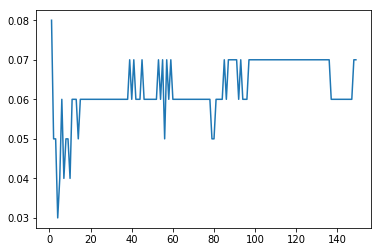

In [14]:
datingDataMat,datingLabels = file2matrix("D:\\datingTestSet2.txt")
normMat,ranges,minVals = autoNorm(datingDataMat)
kx=[]
ky=[]
for k in range(1,150):
    #测试样本的比例
    hoRatio = 0.10      
    m = normMat.shape[0]
    #测试样本的数量
    numTestVecs = int(m*hoRatio)  
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0(normMat[i,:],normMat[numTestVecs:m,:],
                                     datingLabels[numTestVecs:m],k)
        if (classifierResult != datingLabels[i]): errorCount +=1.0
    print("k=%d:the total error rate is: %f" % (k,errorCount/float(numTestVecs)))
    kx.append(k)
    ky.append(errorCount/float(numTestVecs))
plt.plot(kx,ky)

k=1:the total error rate is: 0.030000
k=2:the total error rate is: 0.030000
k=3:the total error rate is: 0.040000
k=4:the total error rate is: 0.040000
k=5:the total error rate is: 0.040000
k=6:the total error rate is: 0.030000
k=7:the total error rate is: 0.030000
k=8:the total error rate is: 0.030000
k=9:the total error rate is: 0.030000
k=10:the total error rate is: 0.030000
k=11:the total error rate is: 0.030000
k=12:the total error rate is: 0.030000
k=13:the total error rate is: 0.030000
k=14:the total error rate is: 0.030000
k=15:the total error rate is: 0.030000
k=16:the total error rate is: 0.030000
k=17:the total error rate is: 0.030000
k=18:the total error rate is: 0.030000
k=19:the total error rate is: 0.030000
k=20:the total error rate is: 0.030000
k=21:the total error rate is: 0.030000
k=22:the total error rate is: 0.030000
k=23:the total error rate is: 0.030000
k=24:the total error rate is: 0.030000
k=25:the total error rate is: 0.030000
k=26:the total error rate is: 0.03

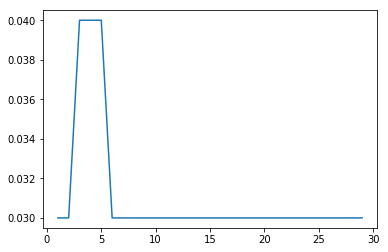

In [11]:
import numpy as np
import operator
import time
def classify0new(inX,dataSet,labels,k,dim):  
    #inX用于分类的输入向量
    #dataSet输入的训练样本集,
    #labels为标签向量, 
    #k用于选择最近的邻居数目
    
    #计算距离
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX,(dataSetSize,1)) - dataSet
    sqDiffMat = abs(diffMat) ** dim
    sqDistances = sqDiffMat.sum(axis=1) 
    distances = sqDistances ** (1.0/dim)
    sortedDistIndicies = distances.argsort() 
    classCount = {}
    #选择距离最小的k个点
    for i in range(k):
        voteIlabel = labels[sortedDistIndicies[i]]
        classCount[voteIlabel] = classCount.get(voteIlabel,0) +1 
    #排序
    sortedClassCount = sorted(classCount.items(),key = operator.itemgetter(1),reverse= True)
    return sortedClassCount[0][0]
datingDataMat,datingLabels = file2matrix("D:\\datingTestSet2.txt")
normMat,ranges,minVals = autoNorm(datingDataMat)
kx=[]
ky=[]
for k in range(1,30):
    #测试样本的比例
    hoRatio = 0.10      
    m = normMat.shape[0]
    #测试样本的数量
    numTestVecs = int(m*hoRatio)  
    errorCount = 0.0
    for i in range(numTestVecs):
        classifierResult = classify0new(normMat[i,:],normMat[numTestVecs:m,:],
                                     datingLabels[numTestVecs:m],4,k)
        if (classifierResult != datingLabels[i]): errorCount +=1.0
    print("k=%d:the total error rate is: %f" % (k,errorCount/float(numTestVecs)))
    kx.append(k)
    ky.append(errorCount/float(numTestVecs))
plt.plot(kx,ky)

ratio=0.01:the total error rate is: 0.456566
ratio=0.02:the total error rate is: 0.350000
ratio=0.03:the total error rate is: 0.267010
ratio=0.04:the total error rate is: 0.179167
ratio=0.05:the total error rate is: 0.134737
ratio=0.06:the total error rate is: 0.088298
ratio=0.07:the total error rate is: 0.138710
ratio=0.08:the total error rate is: 0.067391
ratio=0.09:the total error rate is: 0.084615
ratio=0.10:the total error rate is: 0.076667
ratio=0.11:the total error rate is: 0.080899
ratio=0.12:the total error rate is: 0.062500
ratio=0.13:the total error rate is: 0.062069
ratio=0.14:the total error rate is: 0.048837
ratio=0.15:the total error rate is: 0.069412
ratio=0.16:the total error rate is: 0.061905
ratio=0.17:the total error rate is: 0.053012
ratio=0.18:the total error rate is: 0.060976
ratio=0.19:the total error rate is: 0.048148
ratio=0.20:the total error rate is: 0.070000
ratio=0.21:the total error rate is: 0.054430
ratio=0.22:the total error rate is: 0.048718
ratio=0.23

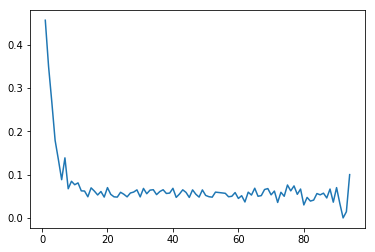

In [48]:
datingDataMat,datingLabels = file2matrix("D:\\datingTestSet2.txt")
normMat,ranges,minVals = autoNorm(datingDataMat)
kx=[]
ky=[]
for k in range(1,95):
    #测试样本的比例
    hoRatio =k/100#不同训练集的比例
    m = normMat.shape[0]
    #测试样本的数量
    numTrainVecs = int(m*hoRatio)  
    errorCount = 0.0
    tot=0
    p=np.random.permutation(m)#生成随机排列
    #p=[i for i in range(m)]
    mat=[]
    label=[]
    for i in range(m):
        mat.append(normMat[p[i],:])#用随机排列打乱数据顺序
        label.append(datingLabels[p[i]])
    mat=np.array(mat)#强制从list类型转换为ndarray数据类型
    #print(mat)
    for i in range(numTrainVecs,m):#后面numTrainVecs~m-1的数据为测试集，0~numTrainVecs-1的数据为训练集
        tot+=1
        classifierResult = classify0(mat[i,:],mat[0:numTrainVecs,:],
                                     label[0:numTrainVecs],4)
        if (classifierResult != label[i]): errorCount +=1.0
    print("ratio=%.2f:the total error rate is: %f" % (hoRatio,errorCount/float(tot)))
    kx.append(k)
    ky.append(errorCount/float(tot))
plt.plot(kx,ky)

In [61]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
datingDataMat,datingLabels = file2matrix("D:\\datingTestSet2.txt")
normMat,ranges,minVals = autoNorm(datingDataMat)
skknn2=KNeighborsClassifier(n_neighbors=4)
m = normMat.shape[0]
numTrainVecs = int(m*0.5)  
skknn2.fit(normMat[0:numTrainVecs,:],datingLabels[0:numTrainVecs])
print("Test set score: {:.2}".format(skknn2.score(normMat[numTrainVecs:m,:],datingLabels[numTrainVecs:m])))

Test set score: 0.96


In [65]:
print(normMat.shape)
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(normMat)
normMatpca=pca.transform(normMat)
print(normMatpca.shape)
skknn2.fit(normMatpca[0:numTrainVecs,:],datingLabels[0:numTrainVecs])
print("Test set score: {:.2}".format(skknn2.score(normMatpca[numTrainVecs:m,:],datingLabels[numTrainVecs:m])))

(1000, 3)
(1000, 3)
Test set score: 0.96


In [66]:
print(normMat.shape)
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(normMat)
normMatpca=pca.transform(normMat)
print(normMatpca.shape)
skknn2.fit(normMatpca[0:numTrainVecs,:],datingLabels[0:numTrainVecs])
print("Test set score: {:.2}".format(skknn2.score(normMatpca[numTrainVecs:m,:],datingLabels[numTrainVecs:m])))

(1000, 3)
(1000, 2)
Test set score: 0.78


In [72]:
def getTestDataSet():
    hwLabels = []
    # 获取目录traningDigits内容(即数据集文件名)，并储存在一个list中
    trainingFileList = listdir('D:\\testDigits')   
    m = len(trainingFileList) #当前目录文件数
    # 初始化m维向量的训练集，每个向量1024维
    trainingMat = np.zeros((m,1024))                  
    for i in range(m):
        fileNameStr = trainingFileList[i]
        # 从文件名中解析分类数字，作为分类标签
        hwLabels.append(classnumCut(fileNameStr))  
        # 将图片矩阵转换为向量并储存在新的矩阵中
        trainingMat[i,:] = img2vector('D:\\testDigits/%s' % fileNameStr)
    return hwLabels,trainingMat
import sklearn
from sklearn.neighbors import KNeighborsClassifier
hwLabels,trainingMat = trainingDataSet()    
testLabels,testMat=getTestDataSet()
skknn3=KNeighborsClassifier(n_neighbors=5) 
skknn3.fit(trainingMat,hwLabels)
print("Test set score: {:.6}".format(skknn3.score(testMat,testLabels)))

Test set score: 0.980973


In [76]:
hwLabels,trainingMat = trainingDataSet()   
skknn3.fit(trainingMatpca,hwLabels)
print("Test set score: {:.6}".format(skknn3.score(trainingMatpca,hwLabels)))
print(trainingMat.shape)
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(trainingMat)
trainingMatpca=pca.transform(trainingMat)
print(trainingMatpca.shape)
skknn3.fit(trainingMatpca,hwLabels)
print("Test set score: {:.6}".format(skknn3.score(trainingMatpca,hwLabels)))

Test set score: 0.981903
(1934, 1024)
(1934, 1024)
Test set score: 0.981903


In [104]:
#tensorflow knn1
def createDataSet1():
    group = np.array([[1.0,1.1],[1.0,1.0],[0,0],[0,0.1]])
    labels = ['A','A','B','B']
    return group,labels
import tensorflow as tf
group,labels=createDataSet1()#group为训练集数据，labels为训练集标签
test=group#test为测试集数据
testlab=labels#testlab为测试集标签
tftrain=tf.placeholder("float",[None,2])
tftest=tf.placeholder("float",[2])
#distance=tf.reduce_sum(tf.abs(tf.add(tftrain,tf.negative(tftest))),axis=1)
distance=tf.sqrt(tf.reduce_sum(tf.square(tf.add(tftrain,tf.negative(tftest))),axis=1))#欧几里得距离
pred=tf.argmin(distance,0)
accuracy=0
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    m=len(test)
    for i in range(m):
        index=sess.run([pred,distance],feed_dict={tftrain:group,tftest:test[i,:]})
        pred_label=labels[index[0]]#index[0]为pred预测值
        true_label=testlab[i]#真实标签
        if pred_label==true_label:
            accuracy+=1
    print("accuracy:",accuracy/m)

accuracy: 1.0


In [115]:
#tensorflow knn2
datingDataMat,datingLabels = file2matrix("D:\\datingTestSet2.txt")
normMat,ranges,minVals = autoNorm(datingDataMat)
#print(normMat.shape)
import tensorflow as tf
hoRatio=0.5
m=normMat.shape[0]
numTrainVecs = int(m*hoRatio)  #前50%划分为训练集，后50%划分为测试集
tftrain=tf.placeholder("float",[None,3])
tftest=tf.placeholder("float",[3])
#distance=tf.reduce_sum(tf.abs(tf.add(tftrain,tf.negative(tftest))),axis=1)
distance=tf.sqrt(tf.reduce_sum(tf.square(tf.add(tftrain,tf.negative(tftest))),axis=1))#欧几里得距离
pred=tf.argmin(distance,0)
accuracy=0
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    tot=0
    for i in range(numTrainVecs,m):
        index=sess.run([pred,distance],feed_dict={tftrain:normMat[0:numTrainVecs,:],tftest:normMat[i,:]})
        pred_label=datingLabels[index[0]]#index[0]为pred预测值
        true_label=datingLabels[i]#真实标签
        if pred_label==true_label:
            accuracy+=1
        tot+=1
    print("accuracy:",accuracy/tot)

accuracy: 0.952


In [120]:
#tensorflow knn3
hwLabels,trainingMat = trainingDataSet()    
testLabels,testMat=getTestDataSet()
#rint(testMat.shape)
import tensorflow as tf
tftrain=tf.placeholder("float",[None,1024])#1*1024的01向量
tftest=tf.placeholder("float",[1024])
#distance=tf.reduce_sum(tf.abs(tf.add(tftrain,tf.negative(tftest))),axis=1)
distance=tf.sqrt(tf.reduce_sum(tf.square(tf.add(tftrain,tf.negative(tftest))),axis=1))#欧几里得距离
pred=tf.argmin(distance,0)
accuracy=0
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    m=testMat.shape[0]
    for i in range(m):
        index=sess.run([pred,distance],feed_dict={tftrain:trainingMat[:,:],tftest:testMat[i,:]})
        pred_label=hwLabels[index[0]]#index[0]为pred预测值
        true_label=testLabels[i]#真实标签
        if pred_label==true_label:
            accuracy+=1
    print("accuracy:",accuracy/m)

accuracy: 0.9862579281183932
